In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from io import StringIO

from utils import BERTmodelTrain

In [3]:


model = BERTmodelTrain(output_dir="/home/cibin/Desktop/exl/TD/models/transformers/model_batch1_v1",
                       labels=['O',"Authentication"])

Loading pretrained model...


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Pretrained model loaded.  Time taken is %f seconds... 1.11


In [4]:
model.load_saved_model()


---Loading model...
---Model loaded. Time taken is %f seconds... 0.5


In [4]:
data_path = '/home/cibin/Desktop/exl/TD/data/DS_v1/annotated/docanno_output/batch1/batch1_247/processed/final'


In [7]:

model.args.data_dir = data_path

In [8]:
train_actual, train_predictions = model._predict_on_file(os.path.join(data_path, 'train.txt'))

file_path :  /home/cibin/Desktop/exl/TD/data/DS_v1/annotated/docanno_output/batch1/batch1_247/processed/final/train.txt
mode :  train


Evaluating: 100%|███████████████████████████████| 25/25 [00:08<00:00,  2.85it/s]

3
results :  {'loss': 0.00040851755649782715, 'precision': 0.9794871794871794, 'recall': 0.9947916666666666, 'f1': 0.9870801033591731}
results :  {'loss': 0.00040851755649782715, 'precision': 0.9794871794871794, 'recall': 0.9947916666666666, 'f1': 0.9870801033591731}



/home/cibin/virtual_envs/nlp_env/lib/python3.11/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Authentication seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


In [9]:
test_actual, test_predictions = model._predict_on_file(os.path.join(data_path, 'test.txt'))

file_path :  /home/cibin/Desktop/exl/TD/data/DS_v1/annotated/docanno_output/batch1/batch1_247/processed/final/test.txt
mode :  test


Evaluating: 100%|█████████████████████████████████| 7/7 [00:02<00:00,  3.29it/s]

3
results :  {'loss': 0.09421509801489135, 'precision': 0.8301886792452831, 'recall': 0.9361702127659575, 'f1': 0.88}
results :  {'loss': 0.09421509801489135, 'precision': 0.8301886792452831, 'recall': 0.9361702127659575, 'f1': 0.88}


In [10]:
labels = ['O', 'Authentication']

def evaluate(df):

    cm = confusion_matrix(df['actual_label'], df['prediction'], labels=labels)
    # print(cm)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prediction')
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    plt.tight_layout()
    plt.show()
    
    precisions = precision_score(df['actual_label'], df['prediction'], labels=labels, average=None)
    recalls = recall_score(df['actual_label'], df['prediction'], labels=labels, average=None)
    
    for i, label in enumerate(labels):
        print("\n-----------------\n")

        print("label : ",label)
        print("precision : ",precisions[i])
        print("recall : ",recalls[i])
            
# evaluate(pred_df)

In [11]:
test_df = pd.read_csv(StringIO(test_actual), sep=' ', header = None)
test_df.columns = ['token','actual_label']

test_pred_df = pd.read_csv(StringIO(test_predictions), sep=' ', header = None)
test_pred_df.columns = ['token','prediction']

test_df['prediction'] = test_pred_df['prediction']
test_df

,token,actual_label,prediction
0,Agent:,O,O
1,Maple,O,O
2,Bank's,O,O
3,Retirement,O,O
4,"Planning,",O,O
...,...,...,...
6679,scam.,O,O
6680,Customer:,O,O
6681,Good,O,O
6682,to,O,O


In [12]:
train_df = pd.read_csv(StringIO(train_actual), sep=' ', header = None)
train_df.columns = ['token','actual_label']

train_pred_df = pd.read_csv(StringIO(train_predictions), sep=' ', header = None)
train_pred_df.columns = ['token','prediction']

train_df['prediction'] = train_pred_df['prediction']
train_df

,token,actual_label,prediction
0,Agent:,O,O
1,Good,O,O
2,morning!,O,O
3,This,O,O
4,is,O,O
...,...,...,...
27429,is,O,O
27430,now,O,O
27431,active.,O,O
27432,Customer:,O,O


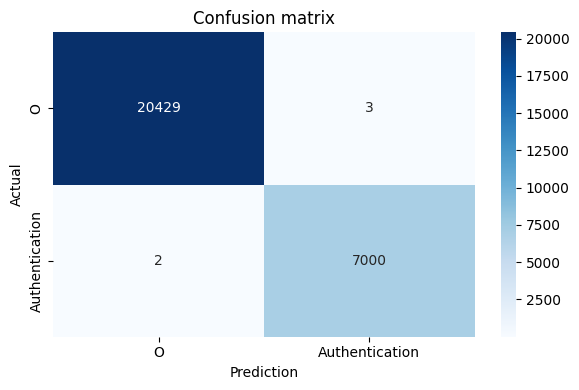


-----------------

label :  O
precision :  0.9999021095394254
recall :  0.9998531714956931

-----------------

label :  Authentication
precision :  0.9995716121662145
recall :  0.9997143673236218


In [13]:
evaluate(train_df[train_df.prediction.isna()==False])

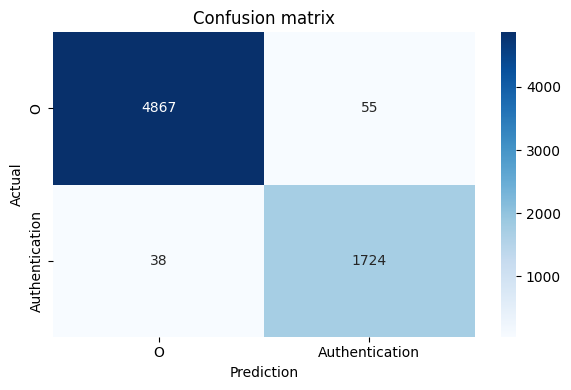


-----------------

label :  O
precision :  0.9922528032619776
recall :  0.9888256806176351

-----------------

label :  Authentication
precision :  0.9690837549184935
recall :  0.978433598183882


In [14]:
evaluate(test_df)

In [6]:
model.model.num_parameters()

107721218